In [1]:
from neo4j import GraphDatabase

def get_neo4j_driver() -> GraphDatabase.driver:
    """Establishes and returns a Neo4j session for AuraDB."""
    neo4j_uri = 'neo4j+s://9d1381c2.databases.neo4j.io:7687'
    neo4j_user = 'Shirley'
    neo4j_password = 'Sxl19950312'
    return GraphDatabase.driver(neo4j_uri, auth=(neo4j_user, neo4j_password))

# Call the function to get the driver
driver = get_neo4j_driver()

# Open a session
with driver.session() as session:
    # Verify connectivity within the session
    session.run("RETURN 1")

print("Connectivity verified successfully.")


from dash import Dash, dcc, html
import plotly.express as px
import pandas as pd


# Define a Cypher query to retrieve the required data
query = """
MATCH (n)
RETURN n
"""

# Execute the query and process the results
with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]

# Converting Neo4j Data to Pandas DataFrame Format
df = pd.DataFrame(neo4j_data)

#print(df)

Connectivity verified successfully.


In [ ]:
import plotly.graph_objects as go
from neo4j import GraphDatabase

query = """
MATCH (p:Product)
RETURN p.name AS Product, p.cupPrice AS CupPrice, p.price AS Price
"""

def get_product_prices():
    products = []
    cup_prices = []
    prices = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            product = record["Product"]
            cup_price = record["CupPrice"]
            price = record["Price"]
            if cup_price is not None and price is not None:
                products.append(product)
                cup_prices.append(cup_price)
                prices.append(price)
    return products, cup_prices, prices

products, cup_prices, prices = get_product_prices()

fig = go.Figure(data=go.Heatmap(
                   z=[prices, cup_prices],
                   x=products,
                   y=['Price', 'Cup Price'],
                   colorscale='Viridis'))

# Change layout
fig.update_layout(
    title="Price Comparison Heatmap",
    xaxis_title="Product",
    yaxis_title="Price Type"
)

fig.show()


In [6]:
import plotly.graph_objects as go
from neo4j import GraphDatabase

query = """
MATCH (p:Product)
RETURN p.name AS Product, p.cupPrice AS CupPrice, p.price AS Price
"""

def get_product_prices():
    products = []
    cup_prices = []
    prices = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            product = record["Product"]
            cup_price = record["CupPrice"]
            price = record["Price"]
            if cup_price is not None and price is not None:
                products.append(product)
                cup_prices.append(cup_price)
                prices.append(price)
    return products, cup_prices, prices

products, cup_prices, prices = get_product_prices()

fig = go.Figure(data=[
    go.Bar(name='Cup Price', x=products, y=cup_prices),
    go.Bar(name='Price', x=products, y=prices)
])

# Change layout
fig.update_layout(
    barmode='group',
    title="Product Cup Price and Price Comparison",
    xaxis_title="Product",
    yaxis_title="Value"
)

fig.show()




In [7]:
import plotly.graph_objects as go
from neo4j import GraphDatabase

query = """
MATCH (p:Product)
RETURN p.name AS Product, p.cupPrice AS CupPrice, p.price AS Price
"""

def get_product_prices():
    products = []
    cup_prices = []
    prices = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            product = record["Product"]
            cup_price = record["CupPrice"]
            price = record["Price"]
            if cup_price is not None and price is not None:
                products.append(product)
                cup_prices.append(cup_price)
                prices.append(price)
    return products, cup_prices, prices

products, cup_prices, prices = get_product_prices()

fig = go.Figure(data=[
    go.Bar(name='Cup Price', x=products, y=cup_prices),
    go.Bar(name='Price', x=products, y=prices)
])


# Change layout
fig.update_layout(
    barmode='group',
    title="Product Cup Price and Price Comparison",
    xaxis_title="Product",
    yaxis_title="Value",
    xaxis=dict(
        tickmode='array',
        tickvals=[],  # Empty list to hide tick labels
    )
)

fig.show()


C:\Users\apple\AppData\Local\Temp\ipykernel_12212\2900645809.py:28: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



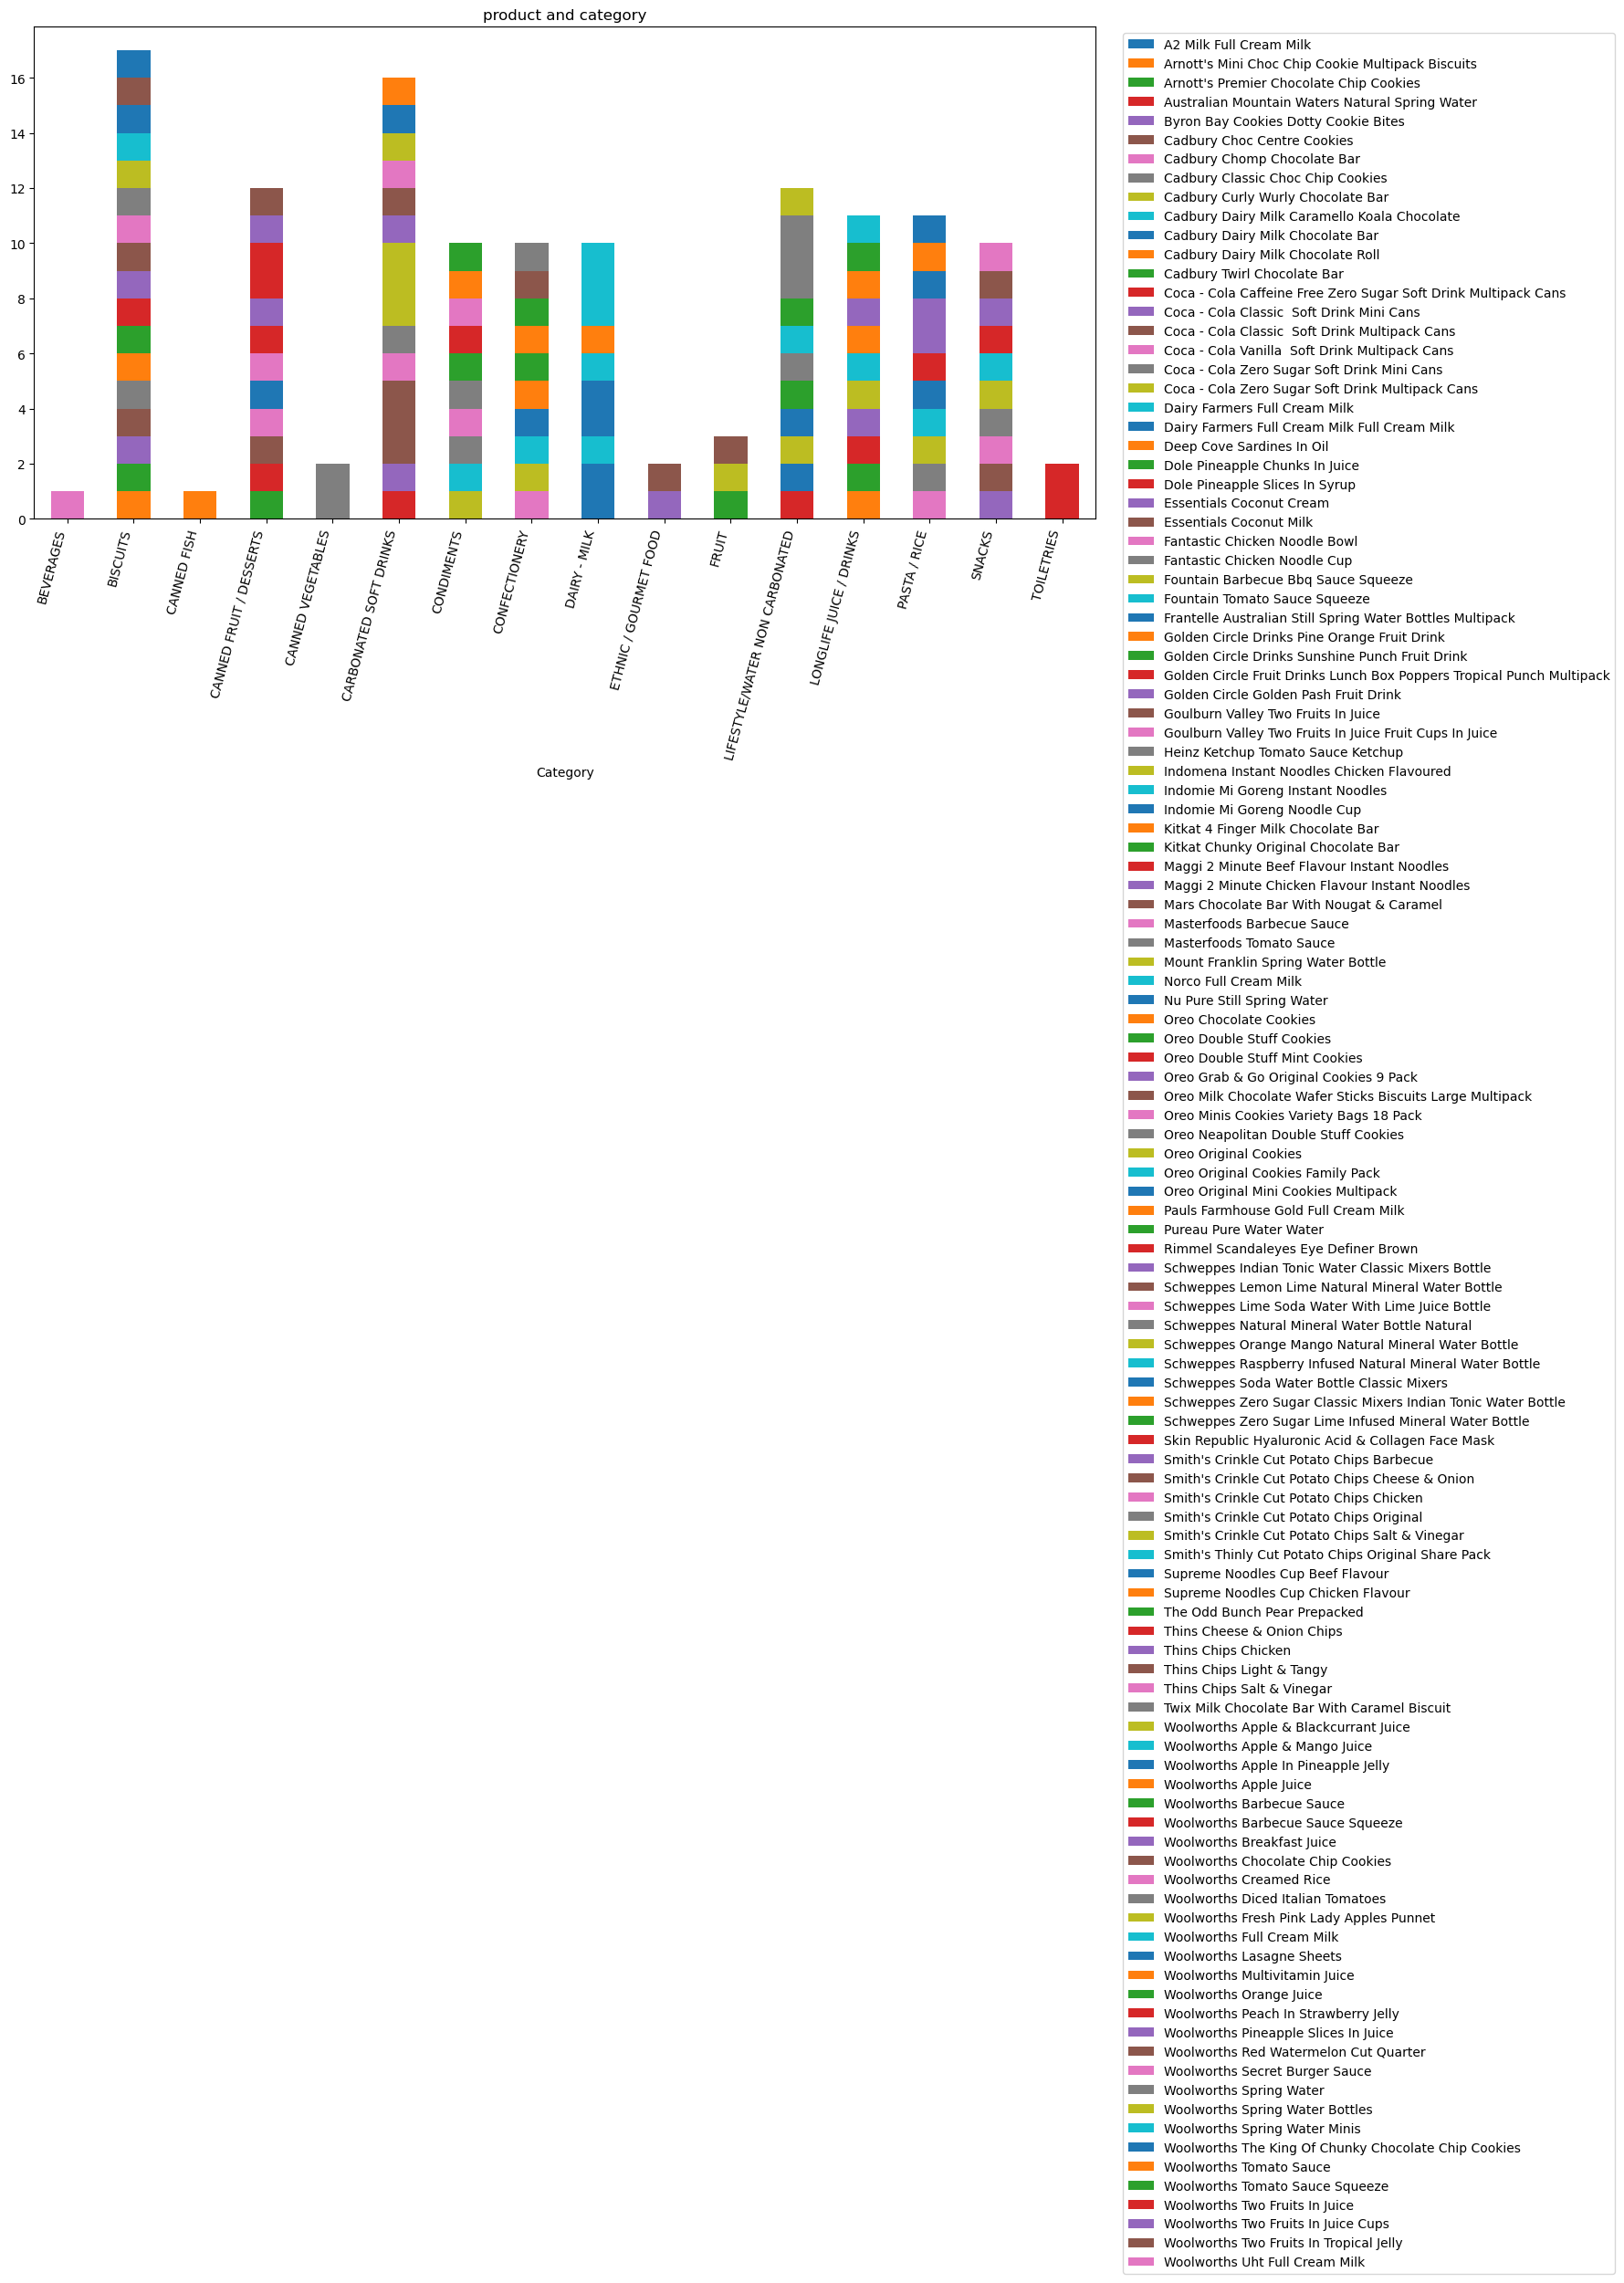

In [14]:
query = """
MATCH (p:Product)-[:STOCKED_IN]->(c:Category)
RETURN p.name AS Product, c.name AS Category
"""

with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]

# convert to Pandas DataFrame
df = pd.DataFrame(neo4j_data)
#print(df.head())

import matplotlib.pyplot as plt


recipe_counts = df.groupby(['Category', 'Product']).size().unstack('Product', fill_value=0)


fig, ax = plt.subplots(figsize=(15, 7))
recipe_counts.plot(kind='bar', stacked=True, ax=ax)

#Adjust label position to prevent overlap
ax.set_title('product and category')
plt.xticks(rotation=75, ha='right')
legend = ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [19]:

import plotly.express as px
from neo4j import GraphDatabase




query = """
MATCH (c:Category)<-[:STOCKED_IN]-(p:Product)
RETURN c.name AS Category, COUNT(p) AS ProductCount
"""


with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]


df = pd.DataFrame(neo4j_data)

# # Use Plotly to draw a bar chart
fig = px.bar(df, x='Category', y='ProductCount', title='Number of Products per Category')
fig.update_layout(xaxis_title='Category', yaxis_title='Product Count')
fig.show()





C:\Users\apple\AppData\Local\Temp\ipykernel_12212\3379810582.py:13: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



In [27]:
import pandas as pd
import plotly.graph_objects as go
from neo4j import GraphDatabase


query = """
MATCH (c:Category)<-[:STOCKED_IN]-(p:Product)
RETURN c.name AS Category, COLLECT(p.name) AS Products
"""


with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]


df = pd.DataFrame(neo4j_data)

# Use Plotly to draw a bar chart
fig = go.Figure()
for index, row in df.iterrows():
    fig.add_trace(go.Scatter(x=row['Products'], y=[row['Category']] * len(row['Products']),
                             mode='markers', name=row['Category']))

fig.update_layout(title='Products per Category',
                  xaxis_title='Products', yaxis_title='Category',
                  showlegend=True, hovermode='closest', 
                  xaxis=dict(
                  tickmode='array',
                  tickvals=[],  # Empty list to hide tick labels
)

)


fig.show()


C:\Users\apple\AppData\Local\Temp\ipykernel_12212\1968959911.py:12: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



In [29]:
import pandas as pd
import plotly.express as px
from neo4j import GraphDatabase


query = """
MATCH (c:Category)<-[:STOCKED_IN]-(p:Product)
RETURN c.name AS Category, collect(p.name) AS Products
"""


with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]


df = pd.DataFrame(neo4j_data)

# Use Plotly to draw a bar chart
fig = px.bar(df.explode('Products'), x='Category', y='Products', title='Products per Category')
fig.update_layout(xaxis_title='Category', yaxis_title='Product')
fig.show()


C:\Users\apple\AppData\Local\Temp\ipykernel_12212\2365825053.py:12: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



In [47]:
import pandas as pd
import plotly.graph_objects as go
from neo4j import GraphDatabase


query = """
MATCH (p:Product)-[:STOCKED_IN]->(c:Category)
RETURN p.name AS Product, c.name AS Category
"""


with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]


df = pd.DataFrame(neo4j_data)

# Pivot the data to draw a stacked bar chart
category_counts = df.groupby(['Category', 'Product']).size().unstack('Product', fill_value=0)

# Create Plotly chart
fig = go.Figure()

# Add stacked bar chart for each category
for column in category_counts.columns:
    fig.add_trace(go.Bar(
        x=category_counts.index,
        y=category_counts[column],
        name=column
    ))

# Renew layout
fig.update_layout(
    barmode='stack',
    title='Category and Product',
    xaxis=dict(
        tickmode='array',
        tickvals=[],  # Empty list to hide tick labels
    )
)


fig.show()


C:\Users\apple\AppData\Local\Temp\ipykernel_12212\3760202406.py:12: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



In [46]:
import pandas as pd
import plotly.graph_objects as go
from neo4j import GraphDatabase


query = """
MATCH (p:Product)-[:STOCKED_IN]->(c:Category)
RETURN p.name AS Product, c.name AS Category
"""


with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]


df = pd.DataFrame(neo4j_data)

# Pivot the data to draw a stacked bar chart
category_counts = df.groupby(['Category', 'Product']).size().unstack('Product', fill_value=0)

# Create a Plotly chart
fig = go.Figure()

# Add stacked bar chart for each category
for column in category_counts.columns:
    fig.add_trace(go.Bar(
        x=category_counts.index,
        y=category_counts[column],
        name=column
    ))

# Renew layout
fig.update_layout(
    barmode='stack',
    title='Category and Product'
)

fig.show()


C:\Users\apple\AppData\Local\Temp\ipykernel_12212\4074227765.py:12: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



In [48]:
import pandas as pd
import plotly.graph_objects as go
from neo4j import GraphDatabase


query = """
MATCH (p:Product)-[:STOCKED_IN]->(c:Category)
RETURN p.name AS Product, c.name AS Category
"""


with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]


df = pd.DataFrame(neo4j_data)

# Pivot the data to draw a heat map
heatmap_data = df.groupby(['Category', 'Product']).size().unstack('Product', fill_value=0)

# Create Plotly heatmap
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='Viridis'
))

# renew layout
fig.update_layout(
    title='Category-Product Relationship Heatmap',
    xaxis_title='Product',
    yaxis_title='Category'
)


fig.show()
#That is about the number for color deep or light

C:\Users\apple\AppData\Local\Temp\ipykernel_12212\2230189852.py:12: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



In [49]:
import pandas as pd
import plotly.graph_objects as go
from neo4j import GraphDatabase


query = """
MATCH (p:Product)-[:STOCKED_IN]->(c:Category)
RETURN p.name AS Product, c.name AS Category
"""


with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]


df = pd.DataFrame(neo4j_data)

# Pivot the data to draw a boxplot
boxplot_data = df.groupby('Category')['Product'].value_counts().unstack(fill_value=0)

# Create Plotly 
fig = go.Figure()

# Add boxplots for each category
for category in boxplot_data.index:
    fig.add_trace(go.Box(
        y=boxplot_data.loc[category],
        name=category,
        boxmean='sd'  # Show mean and standard deviation
    ))

# renew layout
fig.update_layout(
    title='Category-Product Relationship Box Plot',
    xaxis_title='Category',
    yaxis_title='Product Count'
)


fig.show()


C:\Users\apple\AppData\Local\Temp\ipykernel_12212\2244718175.py:12: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



In [52]:
import pandas as pd
import plotly.express as px
from neo4j import GraphDatabase


query = """
MATCH (p:Product)-[:STOCKED_IN]->(c:Category)
RETURN p.name AS Product, c.name AS Category
"""


with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]


df = pd.DataFrame(neo4j_data)

# Pivot data to create a scatter plot
pivot_table = df.groupby('Category')['Product'].count().reset_index()
pivot_table.columns = ['Category', 'ProductCount']
pivot_table['CategoryIndex'] = range(1, len(pivot_table) + 1)  # 添加数值类型的索引

# Draw a scatter plot using Plotly
fig = px.scatter(pivot_table, x='CategoryIndex', y='ProductCount', trendline='ols', title='Category vs Product Count')
fig.update_layout(xaxis_title='Category', yaxis_title='Product Count')
fig.update_xaxes(tickmode='array', tickvals=pivot_table['CategoryIndex'], ticktext=pivot_table['Category'])  # 使用 Category 列作为标签显示
fig.show()




C:\Users\apple\AppData\Local\Temp\ipykernel_12212\2245786220.py:12: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



C:\Users\apple\AppData\Local\Temp\ipykernel_12212\706382183.py:8: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



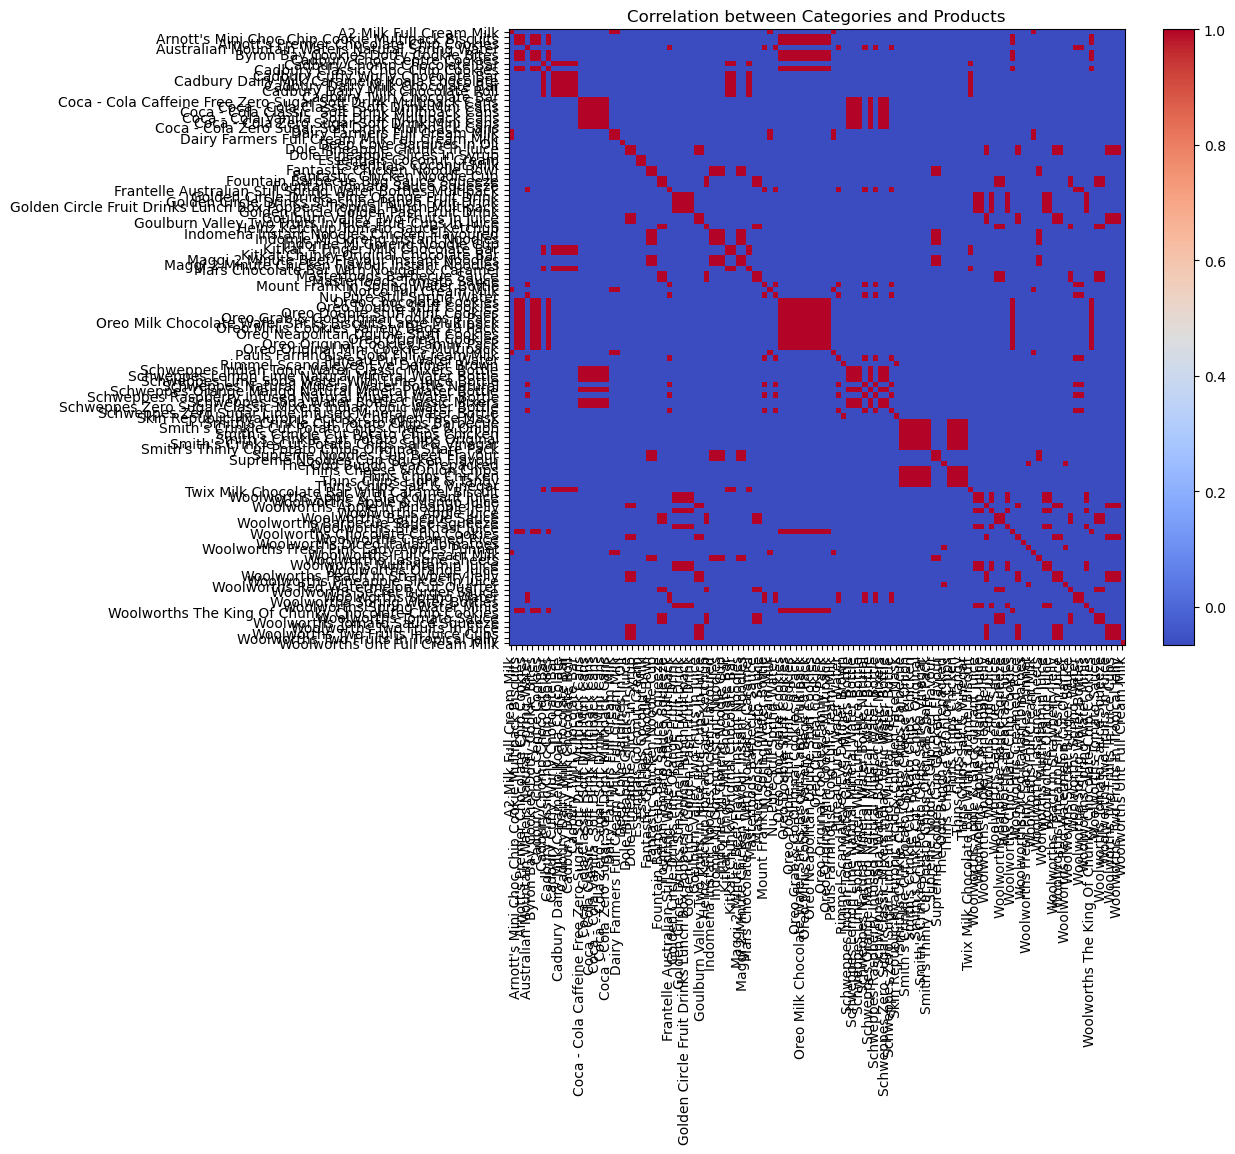

In [61]:
from neo4j import GraphDatabase
import pandas as pd
import matplotlib.pyplot as plt


# Retrieve data from Neo4j
def get_data():
    with driver.session() as session:
        result = session.run("""
            MATCH (c:Category)<-[:STOCKED_IN]-(p:Product)
            RETURN c.name AS Category, p.name AS Product
        """)
        data = [(row["Category"], row["Product"]) for row in result.data()]
        return pd.DataFrame(data, columns=["Category", "Product"])

# Calculate the correlation and plot the image
def plot_correlation():
    df = get_data()
    category_product_matrix = pd.crosstab(df["Category"], df["Product"])
    corr_matrix = category_product_matrix.corr()


    plt.figure(figsize=(10, 8))
    plt.imshow(corr_matrix, cmap='coolwarm')
    plt.colorbar()
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
    plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
    plt.title("Correlation between Categories and Products")
    plt.show()




plot_correlation()


In [70]:
def calculate_correlation():
    df = get_data()
    category_product_matrix = pd.crosstab(df["Category"], df["Product"])
    corr_matrix = category_product_matrix.corr()
    return corr_matrix

corr = calculate_correlation()
print(corr)

from neo4j import GraphDatabase
import pandas as pd
import plotly.graph_objs as go

# Retrieve data from Neo4j
def get_data():
    with driver.session() as session:
        result = session.run("""
            MATCH (c:Category)<-[:STOCKED_IN]-(p:Product)
            RETURN c.name AS Category, p.name AS Product
        """)
        data = [(row["Category"], row["Product"]) for row in result.data()]
        return pd.DataFrame(data, columns=["Category", "Product"])

# Calculate correlations and draw heat maps
def plot_correlation():
    df = get_data()
    category_product_matrix = pd.crosstab(df["Category"], df["Product"])
    corr_matrix = category_product_matrix.corr()

    trace = go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        colorscale='Viridis'
    )

    layout = go.Layout(
        title='Correlation between Categories and Products',
        xaxis=dict(ticks='outside', ticklen=8),
        yaxis=dict(ticks='outside', ticklen=8)
    )

    fig = go.Figure(data=[trace], layout=layout)
    fig.show()


plot_correlation()





C:\Users\apple\AppData\Local\Temp\ipykernel_12212\687201213.py:16: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



Product                                            A2 Milk Full Cream Milk  \
Product                                                                      
A2 Milk Full Cream Milk                                           1.000000   
Arnott's Mini Choc Chip Cookie Multipack Biscuits                -0.066667   
Arnott's Premier Chocolate Chip Cookies                          -0.066667   
Australian Mountain Waters Natural Spring Water                  -0.066667   
Byron Bay Cookies Dotty Cookie Bites                             -0.066667   
...                                                                    ...   
Woolworths Tomato Sauce Squeeze                                  -0.066667   
Woolworths Two Fruits In Juice                                   -0.066667   
Woolworths Two Fruits In Juice Cups                              -0.066667   
Woolworths Two Fruits In Tropical Jelly                          -0.066667   
Woolworths Uht Full Cream Milk                                  

C:\Users\apple\AppData\Local\Temp\ipykernel_12212\3246321013.py:16: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



In [2]:
query = """
MATCH (p:Product)-[:HAS_RECIPE]->(r:Recipe)-[:USES_INGREDIENT]->(i:Ingredient)
OPTIONAL MATCH (p)-[:STOCKED_IN]->(h:Category)
RETURN p.name AS Product, r.ingredients_orig AS Recipe, COUNT(i) AS IngredientCount, h.name AS Categoty, COUNT(h) AS CategoryCount
"""

import pandas as pd
from scipy.stats import pearsonr




df = pd.DataFrame(neo4j_data)


correlation, _ = pearsonr(df['Recipe'], df['Product'])
print(f'Correlation coefficient: {correlation}')




KeyError: 'Recipe'

In [81]:
def count_categories():
    df = get_data()
    num_categories = df['Category'].nunique()
    return num_categories

num_categories = count_categories()
print("Number of categories:", num_categories)



C:\Users\apple\AppData\Local\Temp\ipykernel_12212\3246321013.py:16: DeprecationWarning:

Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.



Number of categories: 16


In [3]:
from neo4j import GraphDatabase
import pandas as pd
from scipy.stats import pearsonr


query = """
MATCH (p:Product)-[:HAS_RECIPE]->(r:Recipe)-[:USES_INGREDIENT]->(i:Ingredient)
OPTIONAL MATCH (p)-[:STOCKED_IN]->(c:Category)
RETURN p.name AS Product, COUNT(i) AS IngredientCount, c.name AS Category
"""

with driver.session() as session:
    result = session.run(query)
    neo4j_data = [record.data() for record in result]


df = pd.DataFrame(neo4j_data)

# Calculate the number of ingredients in the recipe for each product and the number of products in each category
product_ingredient_counts = df.groupby('Product')['IngredientCount'].sum()
category_product_counts = df.groupby('Category')['Product'].nunique()

# Calculate correlation coefficient
correlation, _ = pearsonr(product_ingredient_counts, category_product_counts)
print(f'Correlation coefficient: {correlation}')



ValueError: x and y must have the same length.